In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import numpy as np
from sklearn import preprocessing
import imblearn
from imblearn.combine import SMOTETomek

In [2]:
#member_v3 = pd.read_csv('members_v3.csv')
#train = pd.read_csv('train.csv')
transaction = pd.read_csv('transactions.csv')

In [3]:
train = pd.read_csv('train.csv')

In [4]:
member_v3 = pd.read_csv('members_v3.csv')

In [4]:
member_v3.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [5]:
member_v3.isnull().sum(axis = 0)

msno                            0
city                            0
bd                              0
gender                    4429505
registered_via                  0
registration_init_time          0
dtype: int64

In [6]:
missing_values = pd.DataFrame()
missing_values = member_v3.isnull().sum(axis = 0).reset_index()
missing_values.columns = ['variable', 'missing_count']

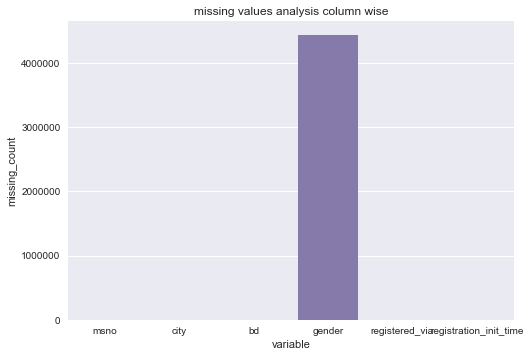

In [7]:
ax = sns.barplot( x = 'variable', y = 'missing_count', data = missing_values)
#plt.xticks(rotation = 90)
plt.ylabel('missing_count')
plt.title('missing values analysis column wise')

In [8]:
def change_datatype(df):
    int_cols = list(df.select_dtypes(include=['int']).columns)
    for col in int_cols:
        if ((np.max(df[col]) <= 127) and(np.min(df[col] >= -128))):
            df[col] = df[col].astype(np.int8)
        elif ((np.max(df[col]) <= 32767) and(np.min(df[col] >= -32768))):
            df[col] = df[col].astype(np.int16)
        elif ((np.max(df[col]) <= 2147483647) and(np.min(df[col] >= -2147483648))):
            df[col] = df[col].astype(np.int32)
        else:
            df[col] = df[col].astype(np.int64)

In [9]:
change_datatype(member_v3)

In [10]:
mem = member_v3.memory_usage(index=True).sum()
print(mem/ 1024**2," MB")

309.8819580078125  MB


In [11]:
member_v3.dtypes

msno                      object
city                       int64
bd                         int64
gender                    object
registered_via             int64
registration_init_time     int64
dtype: object

In [5]:
member_v3['registration_init_time'] = pd.to_datetime(member_v3['registration_init_time'],
                                                   format='%Y%m%d')

In [6]:
def get_month(x):
    txt = str(x)
    y = txt.split('-')
    if len(y) != 3:
        return 'NaN'
    return int(y[1])

def get_year(x):
    txt = str(x)
    y = txt.split('-')
    if len(y) != 3:
        return 'NaN'
    return int(y[0])

In [7]:
member_v3['month'] = member_v3['registration_init_time'].map(lambda x: get_month(x))
member_v3['year'] = member_v3['registration_init_time'].map(lambda x: get_year(x))

In [8]:
member_v3.head()

,msno,city,bd,gender,registered_via,registration_init_time,month,year
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,2011-09-11,9,2011
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,2011-09-14,9,2011
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,2011-09-15,9,2011
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,2011-09-15,9,2011
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,2011-09-15,9,2011


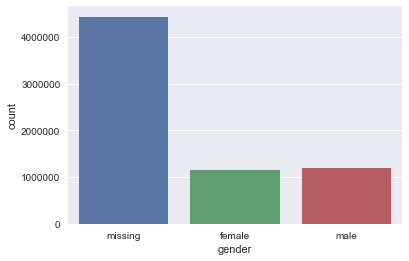

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'gender',data = member_v3)
plt.show()

In [9]:
member_v3['gender'] = member_v3['gender'].fillna('missing')

In [10]:
member_v3.gender.value_counts()

missing    4429505
male       1195355
female     1144613
Name: gender, dtype: int64

In [8]:
print (member_v3['bd'][(member_v3['bd'] > 0) & (member_v3['bd'] < 100)].count())
print (len(member_v3['bd']))
(member_v3['bd'][(member_v3['bd'] > 0) & (member_v3['bd'] < 100)].count())*100/len(member_v3['bd'])

2223464
6769473


32.845451928089531

In [9]:
print(member_v3['bd'][member_v3['bd'] < 0].count())
float(member_v3['bd'][member_v3['bd'] < 0].count()*100)/len(member_v3['bd'])

274


0.004047582433669504

In [10]:
print(member_v3['bd'][member_v3['bd'] > 100].count())
float(member_v3['bd'][member_v3['bd'] > 100].count()*100)/len(member_v3['bd'])

5377


0.07943011221109826

In [11]:
print(member_v3['bd'][member_v3['bd'] == 0].count())
float(member_v3['bd'][member_v3['bd'] == 0].count()*100)/len(member_v3['bd'])

4540215


67.06895795285689

In [12]:
member_v3.loc[member_v3['bd'] < 0, 'bd'] = np.nan
member_v3.loc[member_v3['bd'] > 100, 'bd'] = np.nan

In [13]:
print (len(np.sort(member_v3['bd'].unique())))
np.sort(member_v3['bd'].unique())

102


array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
         18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
         27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
         36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
         45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,
         54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,
         63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,
         72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
         81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
         99.,  100.,   nan])

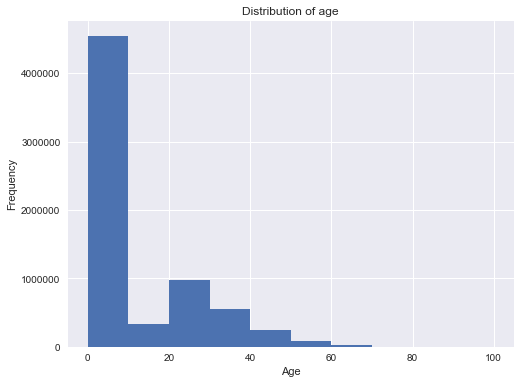

In [24]:
fig, ax = plt.subplots(figsize=[8,6])
ax.set_title("Distribution of age")
ax.set_ylabel("Frequency")
ax.set_xlabel("Age")
member_v3['bd'].hist()
plt.show()

In [25]:
member_v3.year.value_counts()

2016    2246761
2015    1620525
2014     975776
2013     524722
2017     481684
2012     283190
2011     179051
2010     115075
2007      89830
2008      67690
2009      63633
2006      53953
2005      41349
2004      26234
Name: year, dtype: int64

In [26]:
print (len(np.sort(member_v3['year'].unique())))
np.sort(member_v3['year'].unique())

14


array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [ ]:
member_v3.month.value_counts()

In [ ]:
member_v3.shape

In [ ]:
member_v3.registered_via.value_counts()

In [ ]:
train.head()

In [ ]:
transaction.head()

In [ ]:
transaction['transaction_date'] = pd.to_datetime(transaction['transaction_date'],
                                                   format='%Y%m%d')
transaction['membership_expire_date'] = pd.to_datetime(transaction['membership_expire_date'],
                                                   format='%Y%m%d')

In [4]:
transaction.shape

(21547746, 9)

In [ ]:
transaction.is_auto_renew.value_counts()

In [ ]:
mem = transaction.memory_usage(index=True).sum()
print(mem/ 1024**2," MB")

In [3]:
transaction.isnull().sum(axis = 0)

msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64

In [6]:
train = pd.merge(left = train,right = transaction ,how = 'left',on=['msno'])

In [7]:
train.shape

(15883148, 10)

In [9]:
del transaction

In [8]:
train.head()

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,38,7,0,0,0,20161031,20161107,0
1,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,38,30,149,149,0,20170107,20170206,0
2,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,20161031,20161221,0
3,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,20160715,20160821,0
4,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,20160831,20161021,0


In [10]:
train.is_churn.value_counts()

0    15197577
1      685571
Name: is_churn, dtype: int64

In [13]:
train = pd.merge(left = train,right = member_v3 ,how = 'left',on=['msno'])

In [14]:
train.shape

(15883148, 15)

In [15]:
train.head()

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,city,bd,gender,registered_via,registration_init_time
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,38,7,0,0,0,20161031,20161107,0,18.0,36.0,female,9.0,20050406.0
1,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,38,30,149,149,0,20170107,20170206,0,18.0,36.0,female,9.0,20050406.0
2,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,20161031,20161221,0,10.0,38.0,male,9.0,20050407.0
3,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,20160715,20160821,0,10.0,38.0,male,9.0,20050407.0
4,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,20160831,20161021,0,10.0,38.0,male,9.0,20050407.0


In [ ]:
train

In [16]:
train.is_churn.value_counts()

0    15197577
1      685571
Name: is_churn, dtype: int64

In [22]:
train.dtypes

msno                       object
is_churn                    int64
payment_method_id           int64
payment_plan_days           int64
plan_list_price             int64
actual_amount_paid          int64
is_auto_renew               int64
transaction_date            int64
membership_expire_date      int64
is_cancel                   int64
city                      float64
bd                        float64
gender                     object
registered_via            float64
registration_init_time    float64
dtype: object

In [24]:
train.gender.value_counts()

male      3595401
female    3247448
Name: gender, dtype: int64

In [59]:
train.isnull().sum(axis = 0)

msno                            0
is_churn                        0
payment_method_id               0
payment_plan_days               0
plan_list_price                 0
actual_amount_paid              0
is_auto_renew                   0
transaction_date                0
membership_expire_date          0
is_cancel                       0
city                      1600752
bd                        1600752
gender                    9040299
registered_via            1600752
registration_init_time    1600752
dtype: int64

In [60]:
train['city'].fillna(9999.0, inplace=True)
train['bd'].fillna(4444444.0, inplace = True)
train['gender'].fillna('missing', inplace = True)
train['registered_via'].fillna(9999.0, inplace = True)
train['registration_init_time'].fillna(99999999.0, inplace = True)

In [61]:
train =  train.loc[(train.city != 9999.0)]
train =  train.loc[(train.bd != 4444444.0)]
train =  train.loc[(train.gender != 'missing')]
train =  train.loc[(train.registered_via != 9999.0)]
train =  train.loc[(train.registration_init_time != 99999999.0)]

In [62]:
train.shape

(6842849, 15)

In [63]:
train.is_churn.value_counts()

0    6491838
1     351011
Name: is_churn, dtype: int64

In [65]:
train.dtypes

msno                       object
is_churn                    int64
payment_method_id           int64
payment_plan_days           int64
plan_list_price             int64
actual_amount_paid          int64
is_auto_renew               int64
transaction_date            int64
membership_expire_date      int64
is_cancel                   int64
city                      float64
bd                        float64
gender                     object
registered_via            float64
registration_init_time    float64
dtype: object

In [ ]:
train.to_csv('train_new.csv')

In [67]:
len(train['msno'].unique())

391692

In [32]:
train.loc[ train['gender'] == 'male', 'gender'] = 1
train.loc[ train['gender'] == 'female', 'gender'] = 0

In [35]:
X = train.copy()
y = train['is_churn']
X = X.drop('is_churn', axis = 1)
X = X.drop('msno', axis = 1)

In [1]:
train = pd.read_csv('train_new')

NameError: name 'pd' is not defined

In [3]:
train.head()

,Unnamed: 0,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,city,bd,gender,registered_via,registration_init_time
0,0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,38,7,0,0,0,20161031,20161107,0,18.0,36.0,female,9.0,20050406.0
1,1,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,38,30,149,149,0,20170107,20170206,0,18.0,36.0,female,9.0,20050406.0
2,2,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,20161031,20161221,0,10.0,38.0,male,9.0,20050407.0
3,3,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,20160715,20160821,0,10.0,38.0,male,9.0,20050407.0
4,4,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,20160831,20161021,0,10.0,38.0,male,9.0,20050407.0


In [5]:
train.columns

Index(['Unnamed: 0', 'msno', 'is_churn', 'payment_method_id',
       'payment_plan_days', 'plan_list_price', 'actual_amount_paid',
       'is_auto_renew', 'transaction_date', 'membership_expire_date',
       'is_cancel', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time'],
      dtype='object')

In [6]:
train = train.drop('Unnamed: 0', axis = 1)

In [7]:
train.head()

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,city,bd,gender,registered_via,registration_init_time
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,38,7,0,0,0,20161031,20161107,0,18.0,36.0,female,9.0,20050406.0
1,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,38,30,149,149,0,20170107,20170206,0,18.0,36.0,female,9.0,20050406.0
2,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,20161031,20161221,0,10.0,38.0,male,9.0,20050407.0
3,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,20160715,20160821,0,10.0,38.0,male,9.0,20050407.0
4,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,20160831,20161021,0,10.0,38.0,male,9.0,20050407.0


In [8]:
train.shape

(6842849, 15)

In [9]:
len(train.msno.unique())/train.shape[0]

0.0572410702033612

In [10]:
len(train.msno.unique())

391692

In [21]:
train['registration_init_time'] = pd.to_datetime(train['registration_init_time'],
                                                   format='%Y%m%d')

In [22]:
train['transaction_date'] = pd.to_datetime(train['transaction_date'],
                                                   format='%Y%m%d')

In [23]:
train['membership_expire_date'] = pd.to_datetime(train['membership_expire_date'],
                                                   format='%Y%m%d')

In [24]:
train['trans_month'] = train['transaction_date'].map(lambda x: get_month(x))

In [25]:
train['trans_year'] = train['transaction_date'].map(lambda x: get_year(x))

In [26]:
train['expire_month'] = train['membership_expire_date'].map(lambda x: get_month(x))

In [27]:
train['expire_year'] = train['membership_expire_date'].map(lambda x: get_year(x))

In [28]:
train['registration_month'] = train['registration_init_time'].map(lambda x: get_month(x))

In [29]:
train['registration_year'] = train['registration_init_time'].map(lambda x: get_year(x))

In [30]:
trans_dates = train['transaction_date'].value_counts()

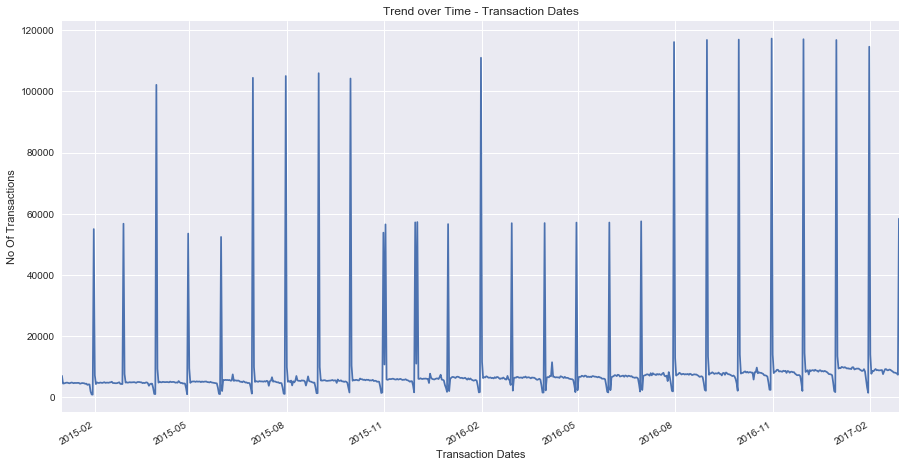

In [31]:
trans_dates.plot(kind ="line",figsize=(15,8))
plt.title("Trend over Time - Transaction Dates")
plt.xlabel("Transaction Dates")
plt.ylabel("No Of Transactions")
plt.show()

In [37]:
train.head()

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,...,bd,gender,registered_via,registration_init_time,trans_month,trans_year,expire_month,expire_year,registration_month,registration_year
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,38,7,0,0,0,2016-10-31,2016-11-07,0,...,36.0,female,9.0,2005-04-06,10,2016,11,2016,4,2005
1,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,38,30,149,149,0,2017-01-07,2017-02-06,0,...,36.0,female,9.0,2005-04-06,1,2017,2,2017,4,2005
2,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,2016-10-31,2016-12-21,0,...,38.0,male,9.0,2005-04-07,10,2016,12,2016,4,2005
3,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,2016-07-15,2016-08-21,0,...,38.0,male,9.0,2005-04-07,7,2016,8,2016,4,2005
4,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,2016-08-31,2016-10-21,0,...,38.0,male,9.0,2005-04-07,8,2016,10,2016,4,2005


In [39]:
train['transaction_date'].nunique()

790

In [40]:
train.shape

(6842849, 21)

In [44]:
train.loc[train['bd'] < 0, 'bd'] = 1000000
train.loc[train['bd'] > 100, 'bd'] = 1000000

In [45]:
train =  train.loc[(train.bd != 1000000)]

In [57]:
train['bd'] = train['bd'].astype(int)

In [46]:
train.shape

(6835311, 21)

In [47]:
train['discount'] = train['plan_list_price'] - train['actual_amount_paid']
print(train.discount.unique())

[    0  -149  -150   149  -894    30  -129  -119  -799    20   180 -1788
  -536  -500   -35    -1  -100  -300    50  -134  -480  -350     1   120
  -447  -450  -400  -930 -1599   -50  -105 -1200   -30 -1150  -131 -1000
  -760   699]


In [48]:
train['is_discount'] = train.discount.apply(lambda x: 1 if x > 0 else 0)
print(train.is_discount.unique())

[0 1]


In [49]:
train['amt_per_day'] = train['actual_amount_paid'] / train['payment_plan_days']

In [59]:
#--- difference in days ---
train['membership_duration'] = train.membership_expire_date - train.transaction_date
train['membership_duration'] = train['membership_duration'] / np.timedelta64(1, 'D')
train['membership_duration'] = train['membership_duration'].astype(int)

In [69]:
train['registration_duration'] = train.membership_expire_date - train.registration_init_time
train['registration_duration'] = train['registration_duration'] / np.timedelta64(1, 'D')
train['registration_duration'] = train['registration_duration'].astype(int)

In [70]:
train['reg_mem_duration'] = train['registration_duration'] - train['membership_duration']

In [62]:
train['autorenew_&_not_cancel'] = ((train.is_auto_renew == 1) == (train.is_cancel == 0)).astype(np.int8)
train['autorenew_&_not_cancel'].unique()

array([0, 1], dtype=int64)

In [64]:
train['notAutorenew_&_cancel'] = ((train.is_auto_renew == 0) == (train.is_cancel == 1)).astype(np.int8)
train['notAutorenew_&_cancel'].unique()

array([0, 1], dtype=int64)

In [71]:
train.columns

Index(['msno', 'is_churn', 'payment_method_id', 'payment_plan_days',
       'plan_list_price', 'actual_amount_paid', 'is_auto_renew',
       'transaction_date', 'membership_expire_date', 'is_cancel', 'city', 'bd',
       'gender', 'registered_via', 'registration_init_time', 'trans_month',
       'trans_year', 'expire_month', 'expire_year', 'registration_month',
       'registration_year', 'discount', 'is_discount', 'amt_per_day',
       'membership_duration', 'autorenew_&_not_cancel',
       'notAutorenew_&_cancel', 'registration_duration', 'reg_mem_duration'],
      dtype='object')

In [72]:
train.head()

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,...,registration_month,registration_year,discount,is_discount,amt_per_day,membership_duration,autorenew_&_not_cancel,notAutorenew_&_cancel,registration_duration,reg_mem_duration
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,38,7,0,0,0,2016-10-31,2016-11-07,0,...,4,2005,0,0,0.000000,7,0,0,4233,4226
1,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,38,30,149,149,0,2017-01-07,2017-02-06,0,...,4,2005,0,0,4.966667,30,0,0,4324,4294
2,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,2016-10-31,2016-12-21,0,...,4,2005,0,0,4.966667,51,1,1,4276,4225
3,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,2016-07-15,2016-08-21,0,...,4,2005,0,0,4.966667,37,1,1,4154,4117
4,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,2016-08-31,2016-10-21,0,...,4,2005,0,0,4.966667,51,1,1,4215,4164


In [78]:
train.dtypes

msno                       object
is_churn                    int64
payment_method_id           int64
payment_plan_days           int64
plan_list_price             int64
actual_amount_paid          int64
is_auto_renew               int64
is_cancel                   int64
city                      float64
bd                          int32
gender                     object
registered_via            float64
trans_month                 int64
trans_year                  int64
expire_month                int64
expire_year                 int64
registration_month          int64
registration_year           int64
discount                    int64
is_discount                 int64
amt_per_day               float64
membership_duration         int32
autorenew_&_not_cancel       int8
notAutorenew_&_cancel        int8
registration_duration       int32
reg_mem_duration            int32
dtype: object

In [75]:
datetime_cols = list(train.select_dtypes(include=['datetime64[ns]']).columns)

In [77]:
train = train.drop(datetime_cols, axis = 1)

In [107]:
train.to_csv('train_new.csv', index = False)

In [82]:
lbl = preprocessing.LabelEncoder()

In [83]:
lbl.fit(train['msno'])
train['msno'] = lbl.transform(train['msno'])

In [88]:
train.loc[ train['gender'] == 'male', 'gender'] = 1
train.loc[ train['gender'] == 'female', 'gender'] = 0

In [90]:
lbl.fit(train['gender'])
train['gender'] = lbl.transform(train['gender'])

In [95]:
train['city'] = train['city'].astype(int)

In [98]:
train['registered_via'] = train['registered_via'].astype(int)

In [103]:
train['amt_per_day'].fillna(9999999.0, inplace=True)

In [104]:
train =  train.loc[(train.amt_per_day != 9999999.0)]

In [110]:
train.isnull().sum(axis = 0)

msno                      0
is_churn                  0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
is_cancel                 0
city                      0
bd                        0
gender                    0
registered_via            0
trans_month               0
trans_year                0
expire_month              0
expire_year               0
registration_month        0
registration_year         0
discount                  0
is_discount               0
amt_per_day               0
membership_duration       0
autorenew_&_not_cancel    0
notAutorenew_&_cancel     0
registration_duration     0
reg_mem_duration          0
dtype: int64

In [5]:
train.dtypes

msno                        int64
is_churn                    int64
payment_method_id           int64
payment_plan_days           int64
plan_list_price             int64
actual_amount_paid          int64
is_auto_renew               int64
is_cancel                   int64
city                        int64
bd                          int64
gender                      int64
registered_via              int64
trans_month                 int64
trans_year                  int64
expire_month                int64
expire_year                 int64
registration_month          int64
registration_year           int64
discount                    int64
is_discount                 int64
amt_per_day               float64
membership_duration         int64
autorenew_&_not_cancel      int64
notAutorenew_&_cancel       int64
registration_duration       int64
reg_mem_duration            int64
dtype: object

In [86]:
train.msno.nunique()

391244

In [2]:
train = pd.read_csv('train_new.csv')

In [7]:
train.shape

(6834422, 26)

In [3]:
X = train.copy()
y = train['is_churn']
X = X.drop('is_churn', axis = 1)
X = X.drop('amt_per_day', axis = 1)

In [4]:
smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

In [11]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [5]:
X_smt.shape

(12883720, 24)

In [8]:
X_smt.target = y_smt

AttributeError: 'numpy.ndarray' object has no attribute 'target'

In [9]:
X_smt.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [10]:
X_smt

array([[  3.70670000e+05,   3.80000000e+01,   7.00000000e+00, ...,
          0.00000000e+00,   4.23300000e+03,   4.22600000e+03],
       [  3.70670000e+05,   3.80000000e+01,   3.00000000e+01, ...,
          0.00000000e+00,   4.32400000e+03,   4.29400000e+03],
       [  1.72325000e+05,   3.90000000e+01,   3.00000000e+01, ...,
          1.00000000e+00,   4.27600000e+03,   4.22500000e+03],
       ..., 
       [  1.48294000e+05,   3.80000000e+01,   3.00000000e+01, ...,
          0.00000000e+00,   3.59553788e+02,   3.29553788e+02],
       [  1.70742000e+05,   3.80000000e+01,   3.00000000e+01, ...,
          0.00000000e+00,   1.96378222e+03,   1.93378222e+03],
       [  1.39861098e+04,   3.80000000e+01,   3.00000000e+01, ...,
          0.00000000e+00,   8.76637477e+02,   8.46637477e+02]])

In [15]:
y_smt.unique()

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

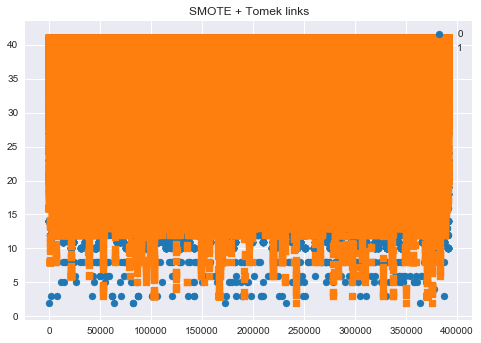

In [12]:
plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

In [13]:
from imblearn.under_sampling import TomekLinks

In [14]:
tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

In [16]:
X_tl.shape

(6685959, 24)

In [20]:
len(y_tl)

6685959

In [22]:
len(y_tl == 1)

6685959

In [23]:
y_tl[0]

1

In [24]:
c = 0
n = 0

In [27]:
for i in range(len(y_tl)):
    if y_tl[i] == 1:
        c = c+1
    elif y_tl[i] == 0:
        n = n+1

In [28]:
c,n

(350439, 6335520)